In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine

# Load data into DataFrames (assuming you've done this)
patients_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')
prescriptions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv')
admissions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')


antibiotic_list = [
    'Cefazolin', 'Cefepime', 'Ceftazidime', 'Ciprofloxacin', 'Clindamycin',
    'Erythromycin', 'Gentamicin', 'Levofloxacin', 'Metronidazole', 'Moxifloxacin',
    'Piperacillin', 'Rifampin', 'Tobramycin', 'Vancomycin', 'Amikacin',
    'Ampicillin', 'Azithromycin', 'Aztreonam'
]

In [3]:
# Check uniqueness of 'subject_id' in both DataFrames
unique_subjects_patients = patients_df['subject_id'].nunique()
unique_subjects_prescriptions = prescriptions_df['subject_id'].nunique()
unique_subjects_admissions = admissions_df['subject_id'].nunique()

prescriptions_df['is_antibiotic'] = prescriptions_df['drug'].isin(antibiotic_list)
antibiotics_per_patient = prescriptions_df.groupby('subject_id')['is_antibiotic'].any().reset_index()

merged_df = pd.merge(patients_df[['subject_id', 'gender']], antibiotics_per_patient, on='subject_id', how='left')

antibiotic_by_gender = merged_df.groupby('gender')['is_antibiotic'].agg(['sum', 'mean'])

no_antibiotics_df = merged_df[merged_df['is_antibiotic'] == False]

no_antibiotics_by_gender = no_antibiotics_df['gender'].value_counts()



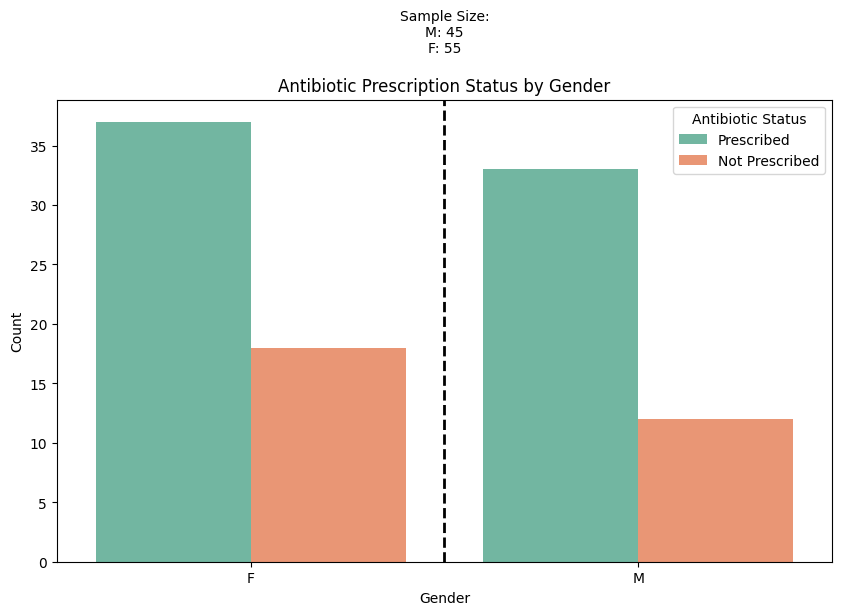

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded these DataFrames
patients_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')
prescriptions_df = pd.read_csv('./mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv')

# List of antibiotics
antibiotic_list = [
    'Cefazolin', 'Cefepime', 'Ceftazidime', 'Ciprofloxacin', 'Clindamycin',
    'Erythromycin', 'Gentamicin', 'Levofloxacin', 'Metronidazole', 'Moxifloxacin',
    'Piperacillin', 'Rifampin', 'Tobramycin', 'Vancomycin', 'Amikacin',
    'Ampicillin', 'Azithromycin', 'Aztreonam'
]

# Determine if each prescription is an antibiotic
prescriptions_df['is_antibiotic'] = prescriptions_df['drug'].isin(antibiotic_list)
antibiotics_per_patient = prescriptions_df.groupby('subject_id')['is_antibiotic'].any().reset_index()

# Merge patients data with prescription data
merged_df = pd.merge(patients_df[['subject_id', 'gender']], antibiotics_per_patient, on='subject_id', how='left')

# Convert boolean to categorical string for visualization
merged_df['antibiotic_status'] = np.where(merged_df['is_antibiotic'], 'Prescribed', 'Not Prescribed')

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_df, x='gender', hue='antibiotic_status', palette='Set2')

# Adding a vertical line to separate males and females
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

# Annotations for sample size
male_count = merged_df[merged_df['gender'] == 'M'].shape[0]
female_count = merged_df[merged_df['gender'] == 'F'].shape[0]
text_position = max(ax.patches, key=lambda x: x.get_height()).get_height() + 0.15 * ax.get_ylim()[1]

ax.text(0.5, text_position, f'Sample Size:\nM: {male_count}\nF: {female_count}', color='black', ha='center')

plt.title('Antibiotic Prescription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Antibiotic Status', loc='upper right')

plt.show()


C:\Users\Marcu\AppData\Local\Temp\ipykernel_2028\3891935350.py:26: UserWarning: The palette list has more values (18) than needed (13), which may not be intended.
  ax = sns.countplot(data=merged_antibiotics_df, x='gender', hue='drug', palette=custom_colors, order=['F', 'M'])


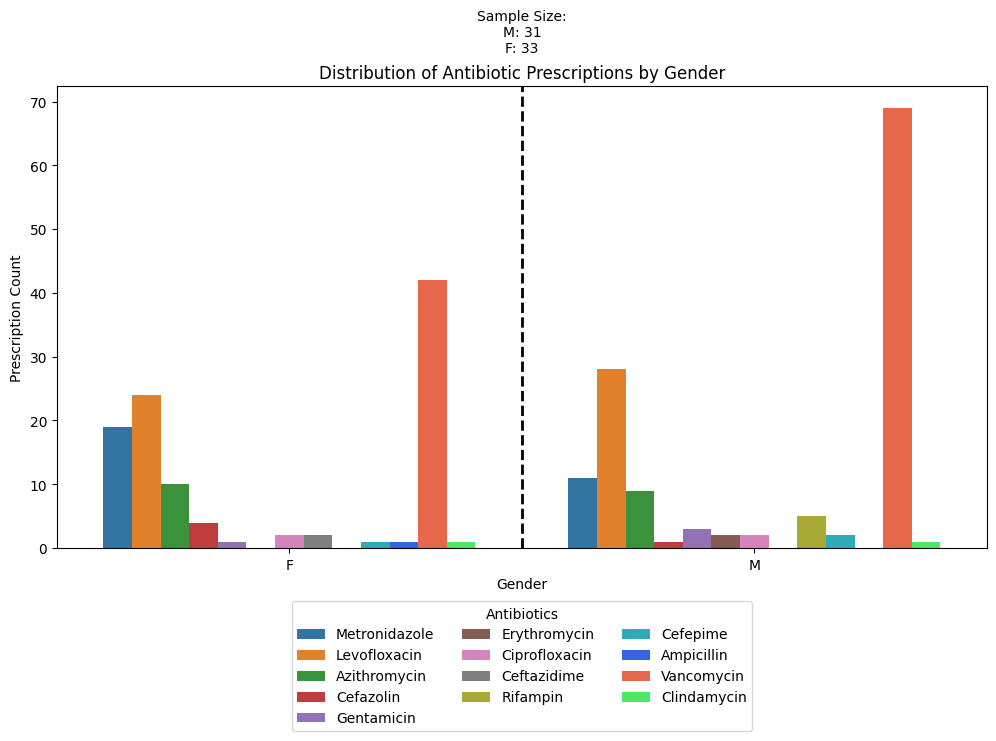

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns




# Filter prescriptions to include only antibiotics
antibiotics_df = prescriptions_df[prescriptions_df['drug'].isin(antibiotic_list)]

# Merge with patient gender information
merged_antibiotics_df = pd.merge(patients_df[['subject_id', 'gender']], antibiotics_df[['subject_id', 'drug']], on='subject_id', how='inner')

unique_male_patients = merged_antibiotics_df[merged_antibiotics_df['gender'] == 'M']['subject_id'].nunique()
unique_female_patients = merged_antibiotics_df[merged_antibiotics_df['gender'] == 'F']['subject_id'].nunique()

# Creating a custom color palette with 18 distinguishable colors
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',  # Keeping '#d62728' as one red
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#1a55FF', '#FFC0CB', '#33FF57', '#B0E0E6', '#82FF33',  # Replaced '#FF5733' with powder blue ('#B0E0E6')
    '#337FFF', '#FF8333', '#33D4FF'
]

# Visualization
plt.figure(figsize=(12, 6))  # Adjusted figure size
ax = sns.countplot(data=merged_antibiotics_df, x='gender', hue='drug', palette=custom_colors, order=['F', 'M'])


# Adding a vertical line to separate males and females
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)

# Annotations for sample size
male_count = merged_antibiotics_df[merged_antibiotics_df['gender'] == 'M'].shape[0]
female_count = merged_antibiotics_df[merged_antibiotics_df['gender'] == 'F'].shape[0]
text_position = max(ax.patches, key=lambda x: x.get_height()).get_height() + 0.12 * ax.get_ylim()[1]

ax.text(0.5, text_position, f'Sample Size:\nM: {unique_male_patients}\nF: {unique_female_patients}', color='black', ha='center')

plt.title('Distribution of Antibiotic Prescriptions by Gender')
plt.xlabel('Gender')
plt.ylabel('Prescription Count')
plt.legend(title='Antibiotics', loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)  # Adjusted legend position

plt.show()


" plt.subplot(1, 2, 2)\nplt.hist(merged_data['age'].dropna(), bins=20, edgecolor='k', color='green')\nplt.title('Age Distribution of Patients')\nplt.xlabel('Age')\nplt.ylabel('Frequency')\n\nplt.tight_layout()\nplt.show() "

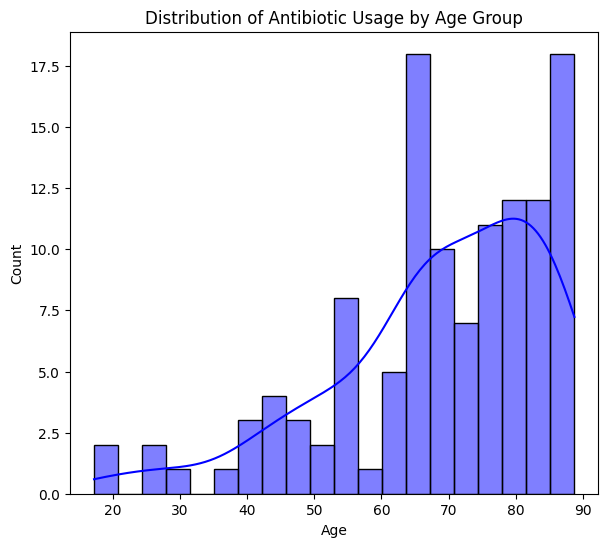

In [6]:
from datetime import datetime
merged_data = pd.merge(patients_df[['subject_id', 'dob']], admissions_df[['subject_id', 'admittime']], on='subject_id', how='inner')

merged_data['dob'] = pd.to_datetime(merged_data['dob'])
merged_data['admittime'] = pd.to_datetime(merged_data['admittime'])


def calculate_age(admittime, dob):
    # Convert Timestamps to datetime objects
    dob = dob.to_pydatetime()
    admittime = admittime.to_pydatetime()

    # Calculate total days from birth to ICU admission
    total_days = (admittime - dob).total_seconds() / (60 * 60 * 24)
    # Convert days to years accounting for leap years (365.242 days per year)
    age_years = total_days / 365.242
    return round(age_years, 4)

merged_data['age'] = merged_data.apply(lambda row: calculate_age(row['admittime'], row['dob']), axis=1)


age_threshold = 110
current_year = datetime.now().year
merged_data['age'] = merged_data.apply(lambda row: np.nan if pd.isna(row['age']) or (current_year - row['dob'].year) > age_threshold else row['age'], axis=1)

# Plot the histograms side by side
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='age', data=merged_data, bins=20, kde=True, color='blue')
plt.title('Distribution of Antibiotic Usage by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

""" plt.subplot(1, 2, 2)
plt.hist(merged_data['age'].dropna(), bins=20, edgecolor='k', color='green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show() """

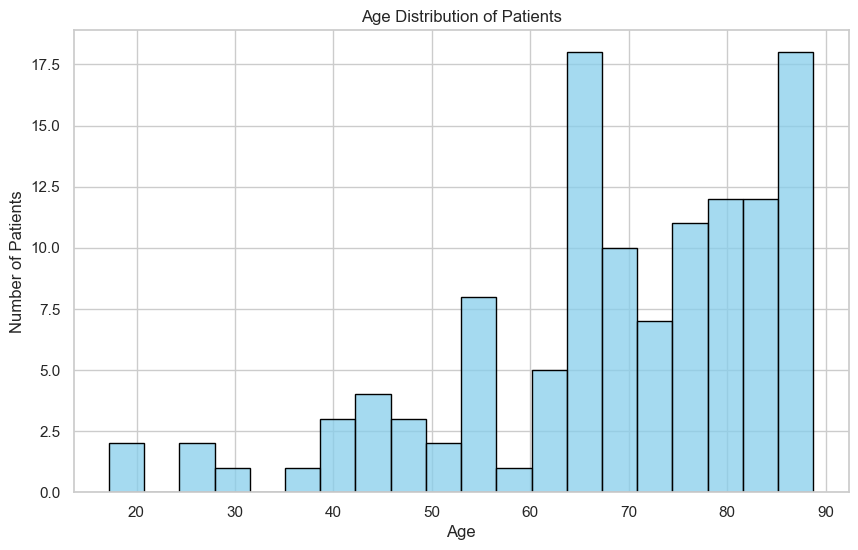

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['age'].dropna(), bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

C:\Users\Marcu\AppData\Local\Temp\ipykernel_31080\1367149306.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20_colors = plt.cm.get_cmap('tab20', 20)


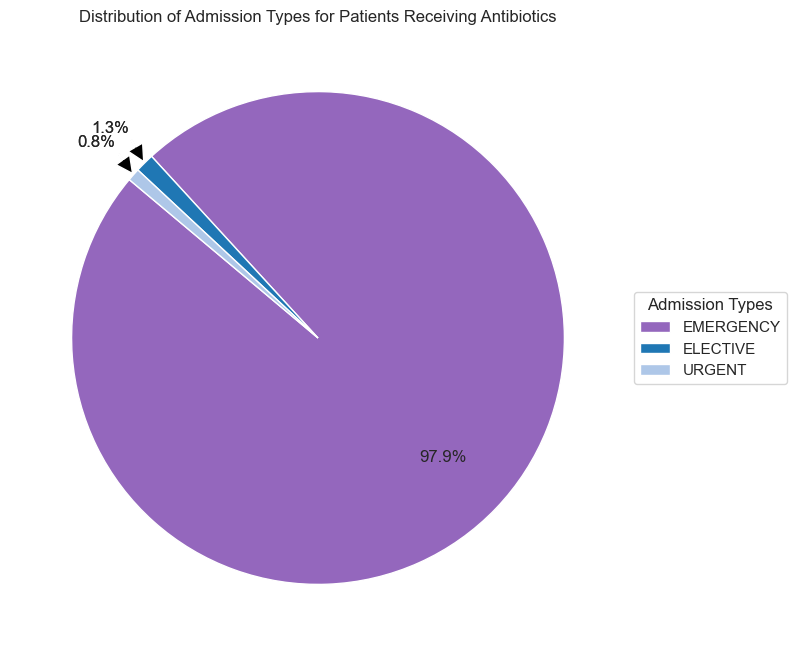

In [111]:
import matplotlib.colors as mcolors
prescriptions_df['is_antibiotic'] = prescriptions_df['drug'].isin(antibiotic_list)
prescriptions_df['is_antibiotic'].fillna(False, inplace=True)

# Merging example, assuming NaN values are handled
merged_df_admin = pd.merge(admissions_df[['subject_id', 'hadm_id', 'admission_type']],
                     prescriptions_df[['subject_id', 'hadm_id', 'is_antibiotic']],
                     on=['subject_id', 'hadm_id'],
                     how='inner')

# Filter to patients who received antibiotics
antibiotic_patients_df = merged_df_admin[merged_df_admin['is_antibiotic']]

# Group by admission type and count unique patients
admission_type_counts = antibiotic_patients_df.groupby('admission_type')['subject_id'].nunique()

# Filter to include only rows where 'is_antibiotic' is True
antibiotic_patients_df = merged_df_admin[merged_df_admin['is_antibiotic'] == True]

admission_counts = antibiotic_patients_df['admission_type'].value_counts()

# Get the 'tab20' colormap
tab20_colors = plt.cm.get_cmap('tab20', 20)

# Sort the admission counts to get the largest pie slice first
sorted_admission_counts = admission_counts.sort_values(ascending=False)

# Define specific colors with red for the largest slice
specific_colors = [tab20_colors(8)]  # Red for the largest slice
specific_colors += [tab20_colors(0), tab20_colors(1)]  # Add shades of blue for others

# Repeat the color list if there are more categories than colors
if len(sorted_admission_counts) > len(specific_colors):
    specific_colors *= len(sorted_admission_counts) // len(specific_colors) + 1

# Create the pie chart with the custom colors
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(admission_counts, colors=specific_colors, autopct='%1.1f%%', startangle=140)

# Adjust the annotations for small slices
threshold = 10  # Threshold for small slice annotation
for i, (patch, text) in enumerate(zip(patches, autotexts)):
    ang = (patch.theta2 + patch.theta1) / 2
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    percentage = float(text.get_text().strip('%'))
    offset = 1.2  # Adjust this value as needed
    if percentage < threshold:
        text.set_position((x*offset, y*offset))
        plt.annotate(f'{percentage}%', xy=(x, y), xytext=(x*offset, y*offset),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                     ha='center', va='center')
    else:
        text.set_position((x*0.7, y*0.7))

# Create a legend with the custom colors
plt.legend(patches, admission_counts.index, title="Admission Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Admission Types for Patients Receiving Antibiotics')
plt.show()




C:\Users\Marcu\AppData\Local\Temp\ipykernel_31080\1321819012.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20_colors = plt.cm.get_cmap('tab20', 20)


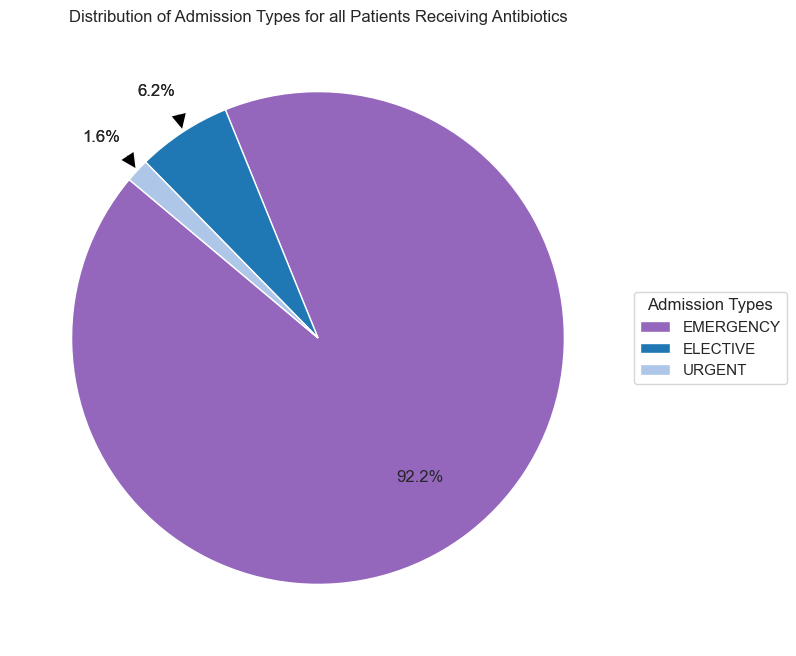

In [113]:
admission_type_counts = admissions_df['admission_type'].value_counts()

# Get the 'tab20' colormap
tab20_colors = plt.cm.get_cmap('tab20', 20)

# Sort the admission counts to get the largest pie slice first
sorted_admission_type_counts = admission_type_counts.sort_values(ascending=False)

# Define specific colors with red for the largest slice
specific_colors = [tab20_colors(8)]  # Red for the largest slice
specific_colors += [tab20_colors(0), tab20_colors(1)]  # Add shades of blue for others

# Repeat the color list if there are more categories than colors
if len(sorted_admission_type_counts) > len(specific_colors):
    specific_colors *= len(sorted_admission_type_counts) // len(specific_colors) + 1

# Create the pie chart with the custom colors
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(sorted_admission_type_counts, colors=specific_colors, autopct='%1.1f%%', startangle=140)

# Adjust the annotations for small slices
threshold = 10  # Threshold for small slice annotation
for i, (patch, text) in enumerate(zip(patches, autotexts)):
    ang = (patch.theta2 + patch.theta1) / 2
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    percentage = float(text.get_text().strip('%'))
    offset = 1.2  # Adjust this value as needed
    if percentage < threshold:
        text.set_position((x*offset, y*offset))
        plt.annotate(f'{percentage}%', xy=(x, y), xytext=(x*offset, y*offset),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                     ha='center', va='center')
    else:
        text.set_position((x*0.7, y*0.7))

# Create a legend with the custom colors
plt.legend(patches, sorted_admission_type_counts.index, title="Admission Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Admission Types for all Patients Receiving Antibiotics')
plt.show()

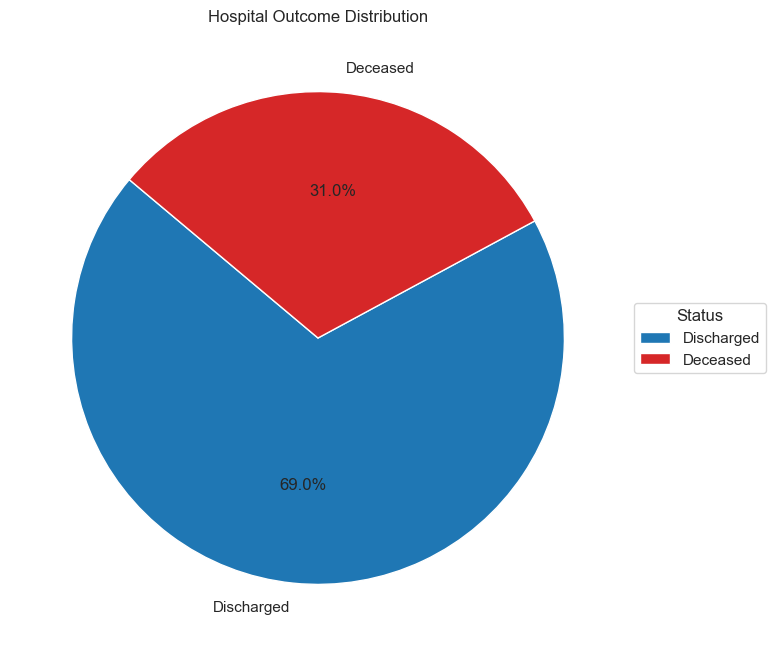

In [116]:
expire_flag_counts = admissions_df['hospital_expire_flag'].value_counts()

expire_flag_labels = ['Discharged' if flag == 0 else 'Deceased' for flag in expire_flag_counts.index]

import matplotlib.pyplot as plt

# Define specific colors
specific_colors = ['#1f77b4', '#d62728']  # Blue for Survived, Red for Expired

# Create the pie chart
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(expire_flag_counts, labels=expire_flag_labels, colors=specific_colors, autopct='%1.1f%%', startangle=140)

# Customize and show the plot
plt.title('Hospital Outcome Distribution')
plt.legend(patches, expire_flag_labels, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()